# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


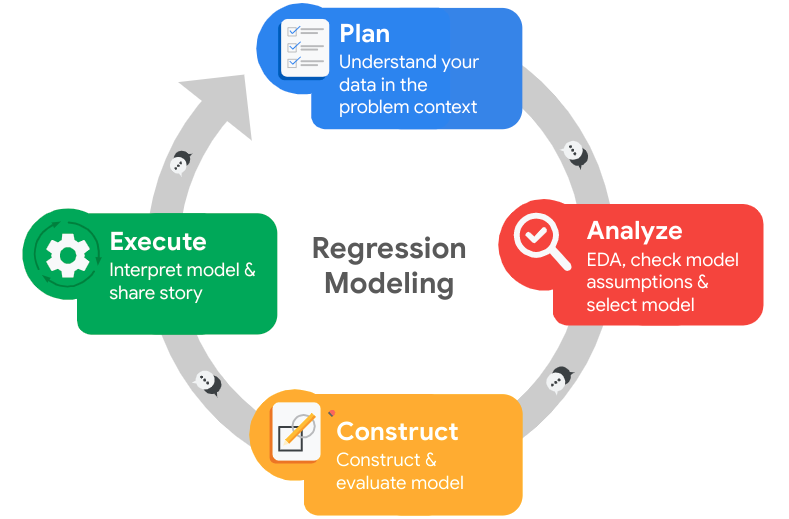

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




### Answers:

- The stakeholders for this project are the management team from Salifor Motors
- I'm trying to develope an algorithm that will predict whether an employee will leave or stay with Salifor Motors by looking at importatnt features that could describe employee satisfaction.
- There seems to be a satisfaction column for employees, however, I would be cautios about this column as this might be biased data, given that employees might not feel comfortable expressing their dissatisfaction to their employer.
- I will be using the notebooks from the "Go Beyond the Numbers" course and will implement their EDA practices to ensure I have the highest quality data for my model. 
- In order to complete the planning stage I will refer to the final course project of the "Foundations to Data Science" course in order to properly structure my project proposal and define my goals accordingly.
- This project deals with a very important ethical consideration which is employee livelihood. Because we are creating an algorithm that basically tells the company if this employee is a valuable asset that will stick around and is worth the investment, we must make sure that our training data contains no bias towards a specific type of employees. 

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ###

# Packages for data manipulation and data processing
import numpy as np
import pandas as pd
from scipy import stats

# Packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import scikit-learn modules for validating and evaluating machine learning models
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import PredefinedSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,\
ConfusionMatrixDisplay

# Import usefule machine learning models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

# Import pickle to save models
import pickle

# Import logistic regression module in case
from sklearn.linear_model import LogisticRegression

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
# Describe the numeric data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Describe the object data
df0.describe(include='object')

,Department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
new_names = {"average_montly_hours":"average_monthy_hours", "Work_accident":"work_accident","Department":"department"}
df0.rename(columns=new_names,inplace=True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_monthy_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().any(axis=0).sum()

0

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_monthy_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df0.drop_duplicates().reset_index(drop=True,inplace=True)

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_monthy_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

In [11]:
# Set dark seaborn background
sns.set_style("darkgrid")

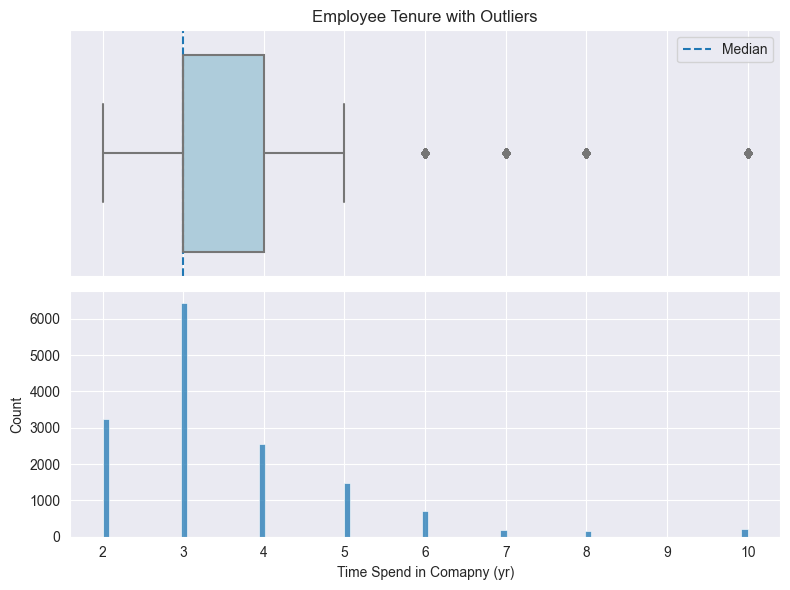

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
pal = sns.color_palette('Paired',4)
fig, (a0, a1) = plt.subplots(figsize=(8,6),nrows=2,sharex=True)
sns.boxplot(x='time_spend_company',data=df0,ax=a0,color=pal[0])
a0.axvline(x=df0.time_spend_company.median(),label='Median',ls='--')
a0.legend()
a0.set_xlabel("")
a1.set_xlabel("Time Spend in Comapny (yr)")
a0.set_title("Employee Tenure with Outliers")

sns.histplot(x='time_spend_company',data=df0, ax=a1, color=pal[1],bins='fd')

plt.tight_layout()



In [13]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
# We will use the IQR rule to find outliers
Q1 = df0['time_spend_company'].quantile(0.25)
Q3 = df0['time_spend_company'].quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5*IQR
UB = Q3 + 1.5*IQR

# Select all rows that are within this bound
df1 = df0[np.logical_and(df0['time_spend_company'] <= UB, df0['time_spend_company'] >= LB)]

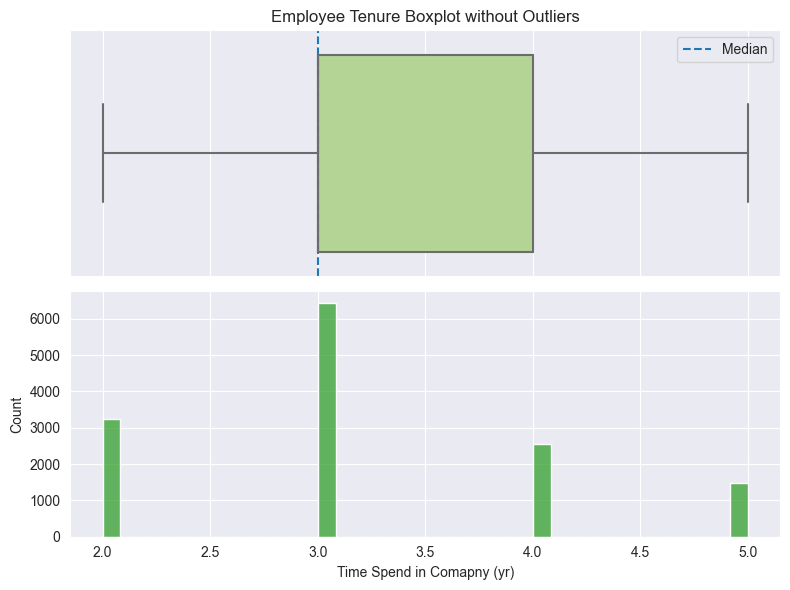

In [14]:

fig, (a0, a1) = plt.subplots(figsize=(8,6),nrows=2,sharex=True)
sns.boxplot(x='time_spend_company',data=df1,ax=a0,color=pal[2])
a0.axvline(x=df1.time_spend_company.median(),label='Median',ls='--')
a0.legend()
a0.set_xlabel("")
a1.set_xlabel("Time Spend in Comapny (yr)")
a0.set_title("Employee Tenure Boxplot without Outliers")

sns.histplot(x='time_spend_company',data=df1, ax=a1, color=pal[3],bins='fd')
plt.tight_layout()

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**Answer:**
- There are 10 departments and 3 classes for salary levels. There were no rows with missing values, however, there were over 3000 rows that were duplicates from one another. And almost 800 rows of the employe tenure column where outliers. We created a new dataframe for the employee tenure without outliers in case the model we chose for predicting turn-over rates is sensitve to outliers
- So far the only distribution we have observed was for the employee tenure and it was a discrete distribution, we could model this ditribution as a Poisson distribution. We noticed that employees that have been with the company for over 5 yrs are considered outliers.
- The only transformation we applied thus far has been to remove the outliers in employee tenure because certain models such a decision trees can be very sensitive to outlier data.
- Some of the purposes of performing EDA is to eliminate any problematic bias in the data, and ensure the quality of the data meets the minimum requirements for our model. We also perform EDA in order to understand the underlyin distributions and correlations between the variables in our dataset.
- So far the only resources I've used have been notebooks from previous courses and reference guides, in order to remember how to manage certain aspects of EDA.
- Some ethical considerations at this point are that we might be overlooking important personel by excluding employees that have been working with the company for over 5 years.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
stay = df0.left.value_counts()[0]
left = df0.left.value_counts()[1]
tot = df0.shape[0]

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print("Percentage of employess who left:",round(left/tot,5)*100,"%")
print("Percentage of employess who stayed:",round(stay/tot,5)*100,"%")

Percentage of employess who left: 23.808 %
Percentage of employess who stayed: 76.19200000000001 %


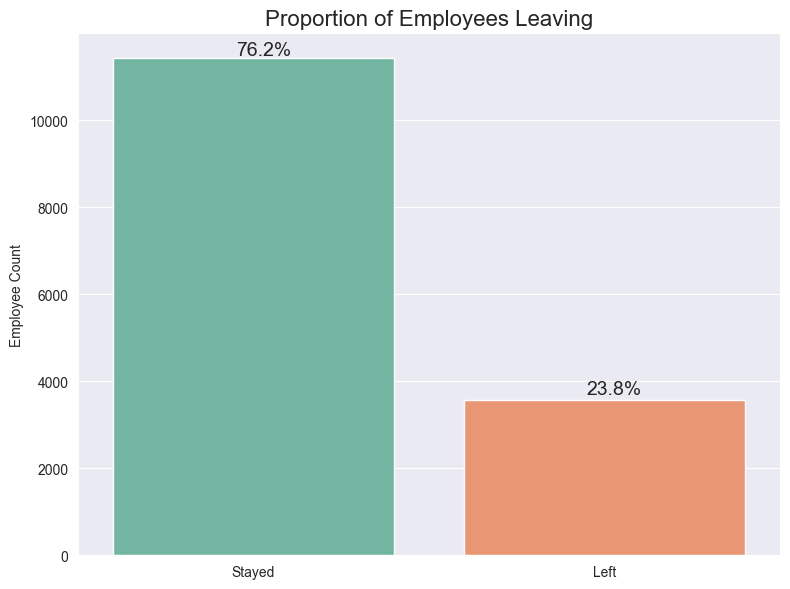

In [56]:
# Visualize this ratio
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='left',data=df0,palette='Set2',ax=ax)
ax.text(x=-0.05,y=11500,s='76.2%',fontsize=14)
ax.text(x=0.95,y=3700,s='23.8%',fontsize=14)
ax.set_xticklabels(['Stayed','Left'])
ax.set_xlabel("")
ax.set_ylabel("Employee Count")
ax.set_title('Proportion of Employees Leaving',fontsize=16)
plt.tight_layout()
plt.savefig('Left_Proportion.png')


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

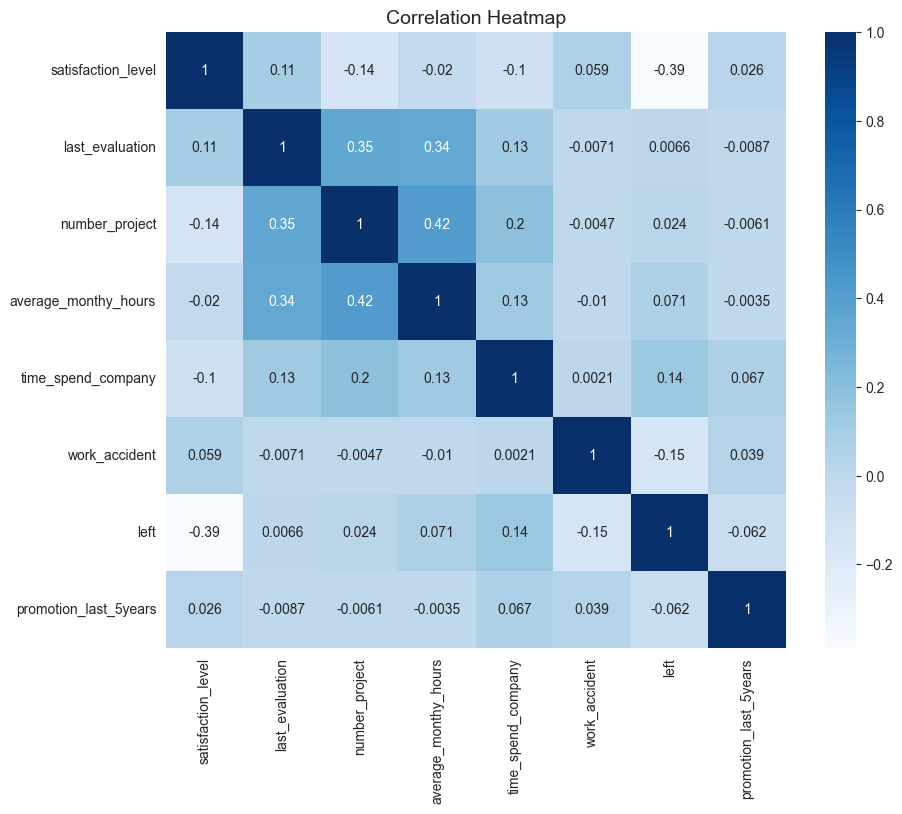

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
# It would be useful to look at the correlation between the features such that we can avoid multi-colinearity
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df0.corr(),annot=True,cmap='Blues',ax=ax)
ax.set_title("Correlation Heatmap",fontsize=14)
plt.show()

In [18]:
# Create new feature to called hr_per_proj
# Such that we remove the multicolinearity of thes two features
df3 = df1.copy(deep=True)
df3['hrs_per_project'] = df1['average_monthy_hours'] / df1['number_project']
df3 = df3.drop(columns=['average_monthy_hours','number_project']).reset_index(drop=True)

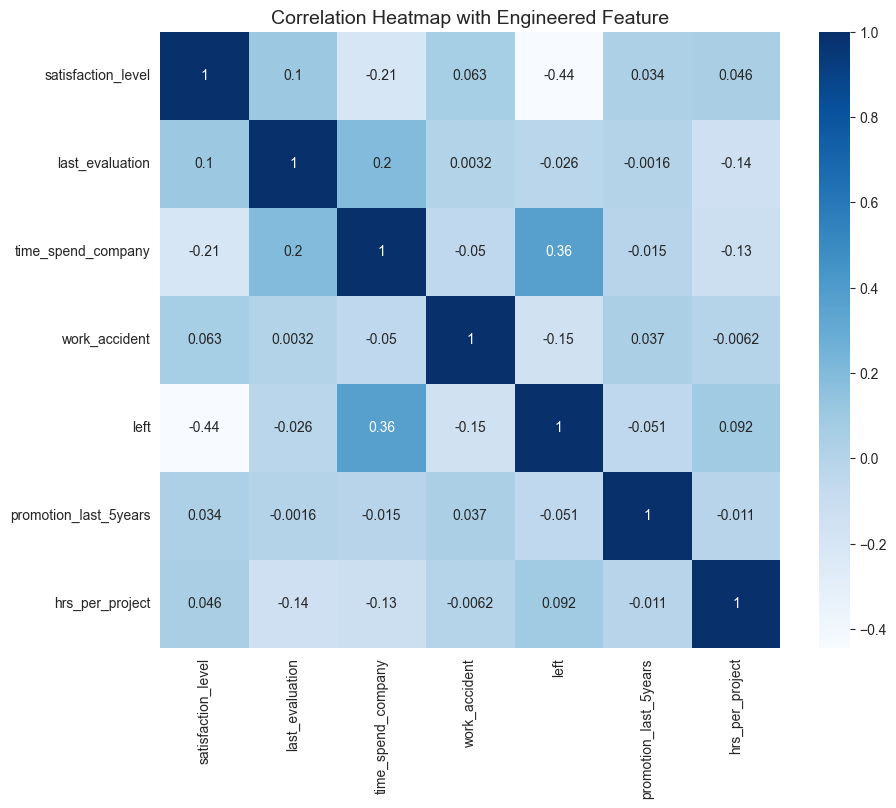

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df3.corr(),annot=True,cmap='Blues',ax=ax)
ax.set_title("Correlation Heatmap with Engineered Feature",fontsize=14)
plt.show()

There doesn't appear to be any significant colinearity between features in the dataset. The strongest correlation is between `number_project` and `average_monthly_hours`. This correlation makes a lot of logical sense because employees who work mor hours are probably because they have multiple project to work on. So that's why I created a new feature that encapsulates the two. We also notice that the strongest inverse correlation is between the `satisfaction_level` and `left`. 

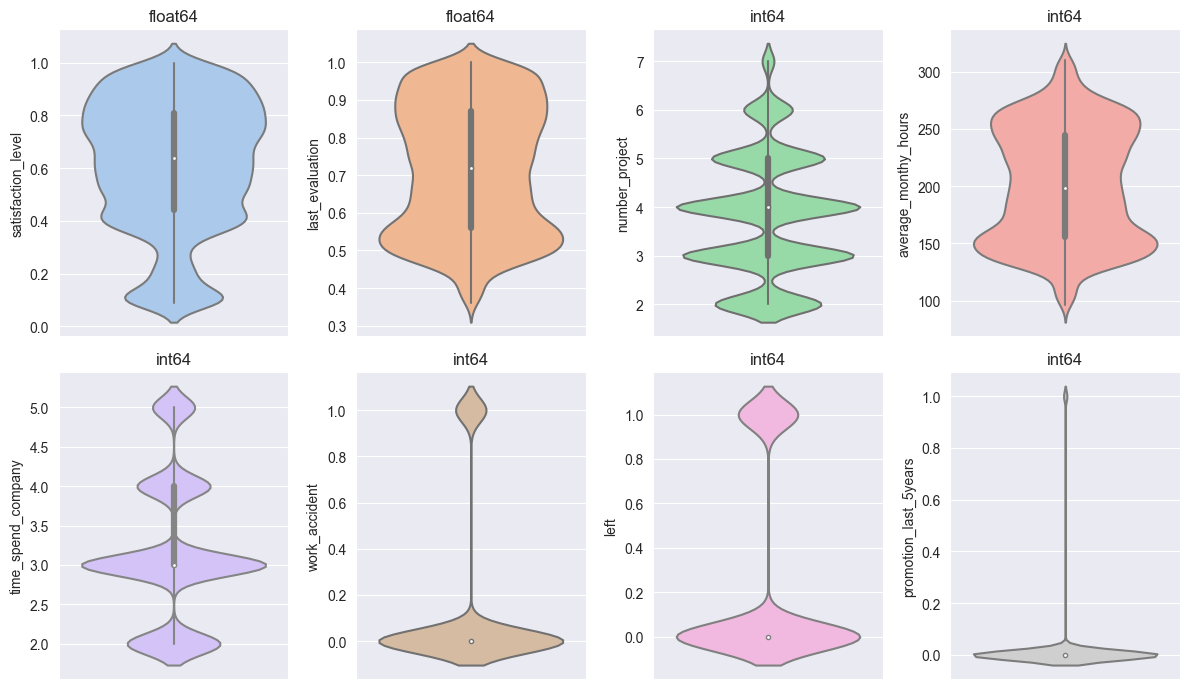

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
# Look at the underlying distribution of numeric data
numeric_df = df1.select_dtypes(include=[np.number])
palette = sns.color_palette("pastel",8)
fig, ax = plt.subplots(figsize=(12,7), ncols=4, nrows=2)
i = 0
for row in ax:
    for col in row:
        sns.violinplot(y=numeric_df.columns[i],data=numeric_df,ax=col,color=palette[i])
        col.set_title(str(numeric_df.dtypes[i]))
        i += 1
plt.tight_layout()
    

We see that all the continuous distributions have a somewhat uniform distribution and the violin plots do a fairly good job at representing the data, however, for the discrete distributions we see that the violin plot does not fully describe them, or at least not so accurately.

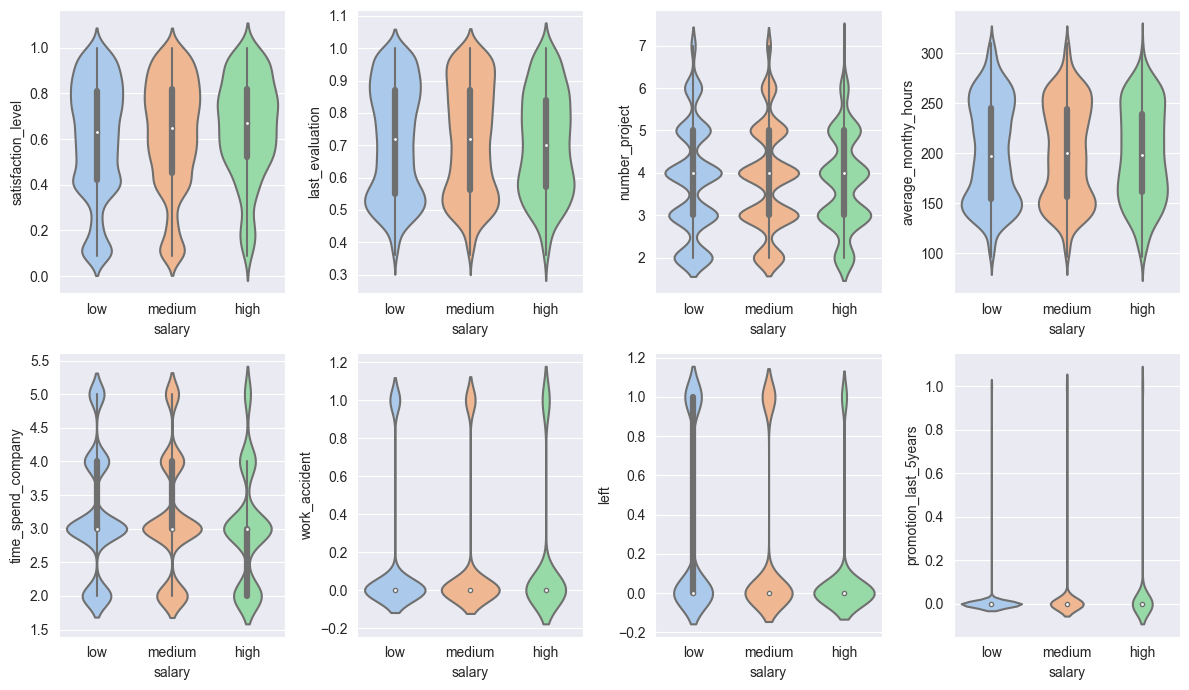

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
# look at these same statistics but for income level
fig, ax = plt.subplots(figsize=(12,7), ncols=4, nrows=2)
i = 0
for row in ax:
    for col in row:
        sns.violinplot(y=df1.columns[i],data=df1,ax=col,x='salary',palette='pastel')
        i += 1
plt.tight_layout()

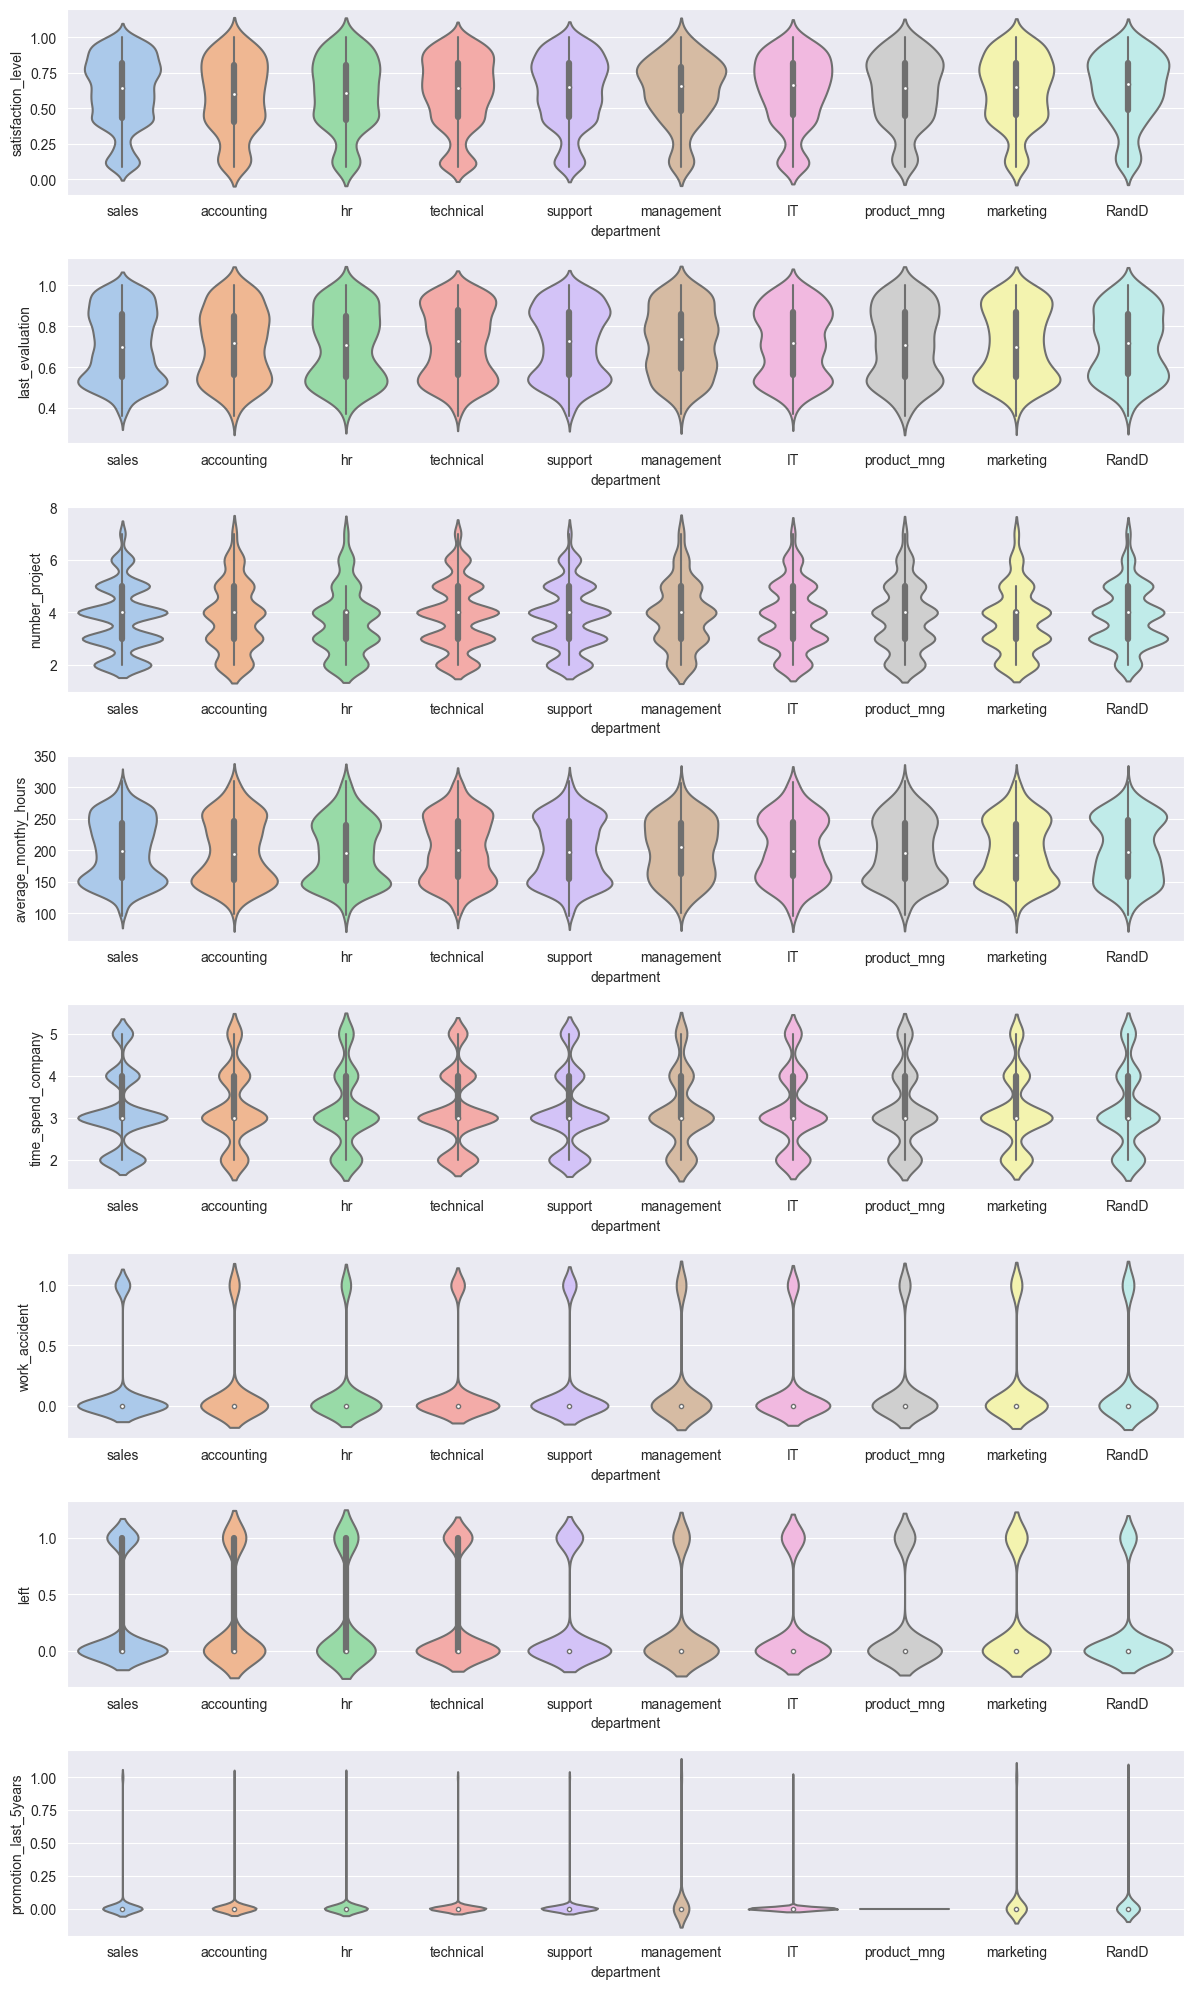

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
# Same statistic but for different dpt
fig, ax = plt.subplots(figsize=(12,20), ncols=1, nrows=8)
i = 0
for row in ax:
    sns.violinplot(y=df1.columns[i],data=df1,ax=row,x='department',palette='pastel')
    i += 1
plt.tight_layout()

Distributions don't appear to vary too much throughout the different departments in the company. We do notice that nobody in the `product_management` department has gotten a promotion in the last year. We also see that the distribution of `left` looks rather similar for all departments with exception to `management`. There are no other noticeable outliers in the existing features aside from the `employee_tenure`.

In [23]:
# Check for class balance for each dpt
size_per = []
for dpt in df1['department'].unique():
    #print(dpt.upper())
    per = round(df1['department'].value_counts()[dpt]/df1.shape[0]*100,3)
    size_per.append(per)
    #print(f"Size:{per}% \n")

The sales department has the most number of data points, this is not necessarily a bad thing but its a good idea to keep it in mind, in case we notice there is more people leaving `Sales` it might be because this dpt simply has more people.

In [24]:
# Check if these same class balances are seen in the the employees who left
left_per = []
for dpt in df1['department'].unique():
    #print(dpt.upper())
    per = round(df1.groupby(['department'])['left'].sum()[dpt]/df1.groupby(['department'])['left'].sum().sum(),4)*100
    left_per.append(per)
    #print(f"Size: {per}% \n")
    

We can look at the difference between sample size to `left` percentage to see if any dpt is loosing more employees after accounting for the dpt size.

In [25]:
size_table = pd.DataFrame({"Department":df1['department'].unique(), "Dpt. Size (%)": size_per,
                           "Dpt. Left Size (%)":left_per, "Dpt (Size - Left)%":np.array(size_per)-np.array(left_per)})
size_table.head(10)

,Department,Dpt. Size (%),Dpt. Left Size (%),Dpt (Size - Left)%
0,sales,27.258,28.73,-1.472
1,accounting,5.191,5.83,-0.639
2,hr,5.045,6.01,-0.965
3,technical,18.517,19.45,-0.933
4,support,15.178,15.08,0.098
5,management,3.558,2.65,0.908
6,IT,8.289,7.91,0.379
7,product_mng,6.029,5.38,0.649
8,marketing,5.577,5.50,0.077
9,RandD,5.358,3.45,1.908


If right-most column is negative then the dpt is losing more employees after normalizing by that dpt size. Which could suggest that the dpt higher employee lefts percentages than other smaller dpts. So we see that the `sales` dpt is losing the most employees even after we account for the dpts size. We also notice that `RandD` has the fewes losses after accounting all the dpt sizes.

However, the sales dpt has very similar distributions to other dpts as seen on the violin plots, maybe the sales dpt grouped with income could explain more about this higher turnover?

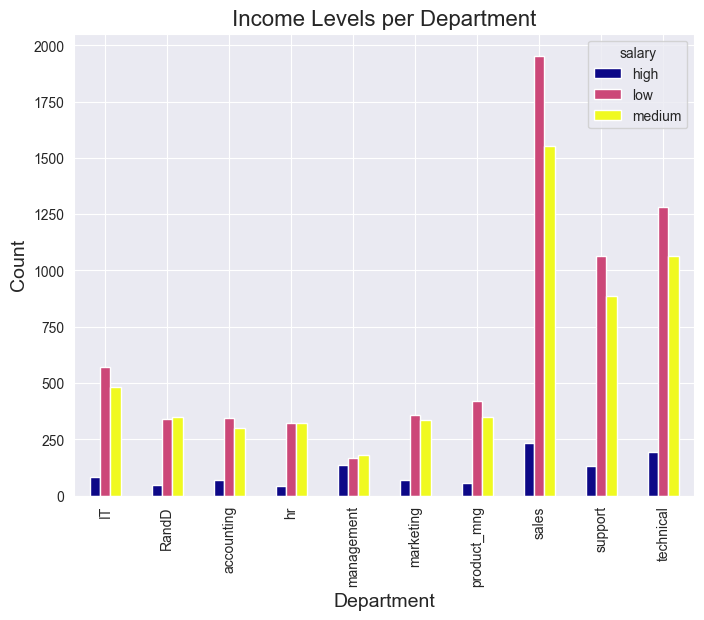

In [26]:
dpt_income = df1.groupby(['department','salary']).size().reset_index(name='count')
fig, ax = plt.subplots(figsize=(8,6))
ax = dpt_income.pivot(index='department', columns='salary', values='count').plot(kind='bar', ax=ax, colormap='plasma')
ax.set_ylabel("Count",fontsize=14)
ax.set_xlabel("Department",fontsize=14)
ax.set_title("Income Levels per Department",fontsize=16)
plt.show()

In [27]:
# This list comprehension takes the count of employees at a sepecift salary level in each department and normalizes the
# them by the size of the dpt.
tot_dpt = dpt_income.groupby(['department']).sum().reset_index()
norm_income = [val/tot_dpt.iloc[tot_dpt.loc[tot_dpt['department'] == dpt_income['department'].iloc[i]]['count'].keys()[0]]['count'] for i, val in enumerate(dpt_income['count'])]


In [28]:
# Add normalized incomes to dataframe
dpt_income['count_per'] = norm_income
dpt_income.head()

,department,salary,count,count_per
0,IT,high,81,0.071240
1,IT,low,572,0.503078
2,IT,medium,484,0.425682
3,RandD,high,46,0.062585
4,RandD,low,341,0.463946


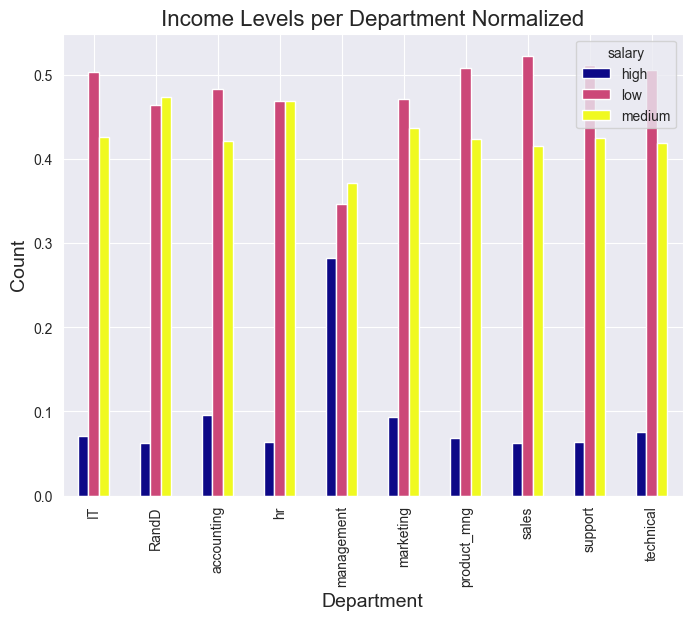

In [29]:
# Plot the income levels per each department
fig, ax = plt.subplots(figsize=(8,6))
ax = dpt_income.pivot(index='department', columns='salary', values='count_per').plot(kind='bar', ax=ax, colormap='plasma')
ax.set_ylabel("Count",fontsize=14)
ax.set_xlabel("Department",fontsize=14)
ax.set_title("Income Levels per Department Normalized",fontsize=16)
plt.show()

In [30]:
# Convert categorical variables to numeric through dummy variable assignation
df3 = pd.get_dummies(df3,drop_first=True)

### Insights

- All the departments have simlart distributions for metrics such as `satisfaction_level`, `last_evaluation`, `number_projects`, `average_monthly_hours`, and `time_spend_company`. Where we would obseve multple peaks and righ-sided skewness, usually trending towards the smaller numbers. 
- We also noticed that this is not variation in the distribution of these same metrics when considering `salary_level`. We saw that the distributions are ver alike for all three levels. We did noticed that higher income employees do not leave the company as often as medium and low income employees, which is to be expected.
- In addition we found out that the `sales` department has the higest percentage of lost employees, after we account for the size of each dpt. This could be indication that something is happening with the `sales` dpt.
- We found out that the sales department has the highest percentage of low-income workers in the company after normalizing by the number of lost employees per dpt.
- And similarly we found that `management` has the highest percentage of high income workes amongst all the departments.
- We also found that the two most correlated variables in our data are `number_projects` and `average_monthly_hours`. While the strongest inverse correlation is between the `satisfaction_level` and `left`. Both of these correlations are very reasonable and somewhat self-explanatory.
- Additionally we see that `management` and `RandD` have the highest employee retention percentages and they both are "top-heavy" in the violin plots for `average_monthly_hours`
- Acknowleding this trend shows that the "bottom-heavy" violin plots for `average_monthly_hours` correspond to the departments with the worst employee retention percentages such as `sales`, `hr` and `accounting`, with the exception of `product_mng`.


# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



- We notice that the percentage of low-income earners per dpt is close to 50% with the `sales` dpt having the highest percentage, and `management` having the lowest percentage. We also notice that management has the highest percentage of high-income earners in the company by almost three times the other dpts. We also see that `last_evaluation` has the lower correlation with whether an employee left or not. The variables with highest correlation is `satisfaction_level` and `time_spent_company`.
- We should exclude variables with very little correlation to the `left` variable because they don't have a good predictive power over the outcome variable. Aside from that all the other features have good correlation values to the outcome variable.
- The assumption about no multicolinearity, feature independace and no extreme outliers is met for all selected features.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

We are trying to predict a categorical variable `left` which indicates whether an employee has left the company (1) or not (0).

### Identify the types of models most appropriate for this task.

There is a variety of different models we could use for modeling our data, some of the preffered methods would be:
- Tuned Categorical Gradiend Boosting (CGBoost)
- Tuned Random Forest
- Logistic regression



### Modeling

Add as many cells as you need to conduct the modeling process.

In [31]:
# Regardless of the model we must assigng the target variable and the features
y = df3['left']
X = df3.copy()
# Drop target variable and feature with lowest correlation score
X.drop(columns=['left','last_evaluation'],inplace=True)

In [32]:
# Display features
X.head()

,satisfaction_level,time_spend_company,work_accident,promotion_last_5years,hrs_per_project,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,3,0,0,78.500000,0,0,0,0,0,0,1,0,0,1,0
1,0.11,4,0,0,38.857143,0,0,0,0,0,0,1,0,0,0,1
2,0.72,5,0,0,44.600000,0,0,0,0,0,0,1,0,0,1,0
3,0.37,3,0,0,79.500000,0,0,0,0,0,0,1,0,0,1,0
4,0.41,3,0,0,76.500000,0,0,0,0,0,0,1,0,0,1,0


In [33]:
# Check class balance
print(f"Left class balanace: {round(y.value_counts()[1]/y.shape[0],4)*100}%")
print(f"Stayed class balanace: {round(y.value_counts()[0]/y.shape[0],4)*100}%")

Left class balanace: 24.51%
Stayed class balanace: 75.49%


In [34]:
# Split data into train and test set on 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    stratify=y, random_state=42)

In [35]:
# Split training set inot validation sets, 75/25 to final ratio 60/20/20 for train/validate/test
# This validation set will primarily be used to avoid overfittings and model adaptability to randomness
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25,
                                            stratify=y_train, random_state=42)

In [36]:
# Verify split was done as intended
print("Train Size:",X_tr.size/(X_test.size + X_tr.size + X_val.size))
print("Validation Size:",X_val.size/(X_test.size + X_tr.size + X_val.size))
print("Test Size:",X_test.size/(X_test.size + X_tr.size + X_val.size))


Train Size: 0.5999125173142815
Validation Size: 0.20004374134285924
Test Size: 0.20004374134285924


<h2 align='center'> CGBoost Machine <h2>

In [37]:
### YOUR CODE HERE ###
# We will begin with an XGBoosting machine
# Instantiate the classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Define the parameters that will be used by GridSearch
xgb_cv_params = {"max_depth":[4,5,6,7],
            "min_child_weight":[1,2,3,4,5],
             "learning_rate":[0.1,0.2,0.3],
             "n_estimators":[5,10,15],
             "subsample":[0.6,0.9],
             "colsample_bytree":[0.6,0.9]
            }
# Define the metrics used to evaluate model performance
xgb_scoring = {"accuracy","precision","recall","f1"}

# Define costume split index for improved model variability
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

# Define GridSearch object on these parameters
xgb_cv = GridSearchCV(xgb, xgb_cv_params, scoring=xgb_scoring, cv=custom_split, refit='f1')

<h2 align='center'> Random Forest <h2>

In [38]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Define dictionary of hyperparameters for GridSearch
rf_cv_params = {'max_depth': [2,3,4,5, None], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,3,4],
             'n_estimators': [75, 100, 125]
               } 

# Define the metrics used to evaluate model performance
rf_scoring = {"accuracy","precision","recall","f1"}

# Instantiate GridSearch object with defined parameters
rf_cv = GridSearchCV(rf, rf_cv_params, scoring=rf_scoring, cv=custom_split, refit='f1')

<h2 align='center'> Train Models <h2>

In [39]:
# %%time
# # Train XGBoost
# xgb_cv.fit(X_train, y_train)

# # Use pickle to save model
# with open("xgb_cv_model.pickle","wb") as to_write:
#     pickle.dump(xgb_cv, to_write)

In [40]:
# %%time
# rf_cv.fit(X_train, y_train)

# # Use pickle to save model
# with open("rf_cv_model.pickle",'wb') as to_write:
#     pickle.dump(rf_cv, to_write)

In [43]:
print(pickle.format_version)

4.0


In [45]:
# Read the models saved as .pickle files

with open("xgb_cv_model.pickle","rb") as to_read:
    xgb_cv = pickle.load(to_read) 
with open("rf_cv_model.pickle","rb") as to_read:
    rf_cv = pickle.load(to_read)

c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator GridSearchCV from version 0.22.2.post1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
# Print best hyperparameters for each model
print("XGBoost Classifier Best Hyper-Parameters")
print(xgb_cv.best_params_)
print("Best F1 score:",xgb_cv.best_score_,"\n")

print("Tuned Random Forest Hyper-Parameters")
print(rf_cv.best_params_)
print("Best F1 score:",rf_cv.best_score_)

XGBoost Classifier Best Hyper-Parameters
{'colsample_bytree': 0.9, 'learning_rate': 0.3, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 15, 'subsample': 0.9}
Best F1 score: 0.9423368740515934 

Tuned Random Forest Hyper-Parameters
{'max_depth': None, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 125}
Best F1 score: 0.9619118745332338


## Evaluate each model

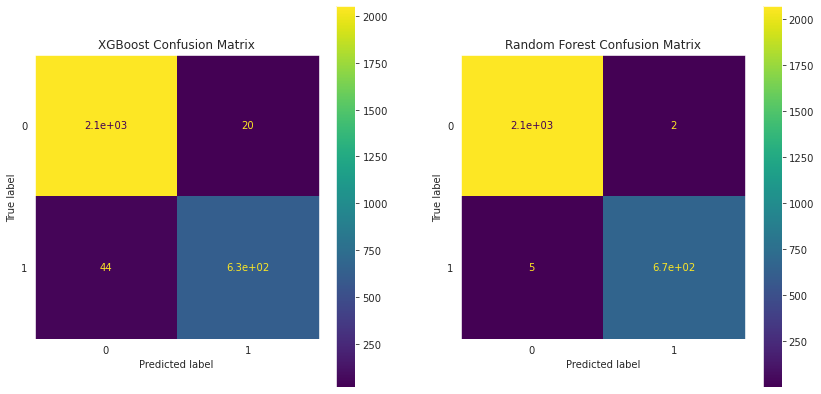

In [ ]:
# Predict from validation set
xgb_y_pred = xgb_cv.predict(X_val)
rf_y_pred = rf_cv.predict(X_val)

# Compute the confusion matrices
xgb_cm = confusion_matrix(y_val, xgb_y_pred, labels=xgb_cv.classes_)
rf_cm = confusion_matrix(y_val, rf_y_pred, labels=rf_cv.classes_)

# Plot the matrices
fig, (a0, a1) = plt.subplots(figsize=(14,7),ncols=2)
xgb_disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=xgb_cv.classes_).plot(ax=a0)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf_cv.classes_).plot(ax=a1)
a0.grid(False)
a1.grid(False)
a0.set_title("XGBoost Confusion Matrix")
a1.set_title("Random Forest Confusion Matrix")
plt.show()

In [ ]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'F1': f1,
                        'Recall': recall,
                        'Precision': precision,
                        'Accuracy': accuracy
                        },
                        ignore_index=True
                       )
  
    return table
table = make_results("Tuned XGBoost",xgb_cv)
rf_table = make_results("Tuned Random Forest",rf_cv)

In [ ]:
table.merge(rf_table,how='outer')

,Model,F1,Recall,Precision,Accuracy
0,Tuned XGBoost,0.942337,0.924107,0.961300,0.972303
1,Tuned Random Forest,0.961912,0.958333,0.965517,0.981414


## Test Champion Model - Random Forest

In [ ]:
# Compute the predicted values for champion model
champ_pred = rf_cv.predict(X_test)

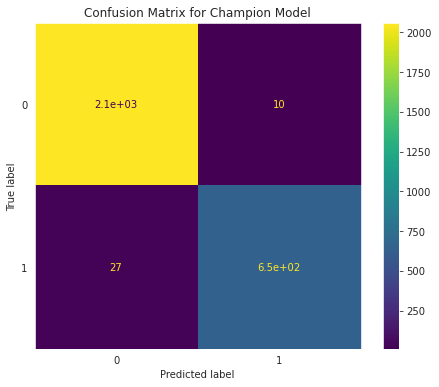

In [ ]:
# Display the confusion matrix
ch_cm = confusion_matrix(y_test, champ_pred, labels=rf_cv.classes_)

# Create display of confusion matrix
fig, ax = plt.subplots(figsize=(8,6))
disp = ConfusionMatrixDisplay(confusion_matrix=ch_cm, display_labels=rf_cv.classes_).plot(ax=ax)
ax.set_title("Confusion Matrix for Champion Model")

# Plot confusion matrix
plt.grid(False)

# Display plot
### YOUR CODE HERE ###
plt.show()

In [ ]:
# Compute the metrics
champ_accuracy = accuracy_score(y_test, champ_pred)
champ_precision = precision_score(y_test, champ_pred)
champ_recall = recall_score(y_test, champ_pred)
champ_f1 = f1_score(y_test,champ_pred)

champ_table = pd.DataFrame({"Model":"Tuned Random Forest",
                        "F1":[champ_f1],
                        "Precision":[champ_precision],
                        "Recall":[champ_recall],
                        "Accuracy":[champ_accuracy]})
champ_table

,Model,F1,Precision,Recall,Accuracy
0,Tuned Random Forest,0.97216,0.984756,0.959881,0.986516


In [ ]:
# Look at feature importance
importances = rf_cv.best_estimator_.feature_importances_
importance_df = pd.DataFrame({"Feature":X_test.columns, "Importance":importances})
importance_df.sort_values(by='Importance', ascending=False,inplace=True)
df_drop = importance_df[importance_df['Feature'].isin(importance_df['Feature'][3:])]

In [ ]:
len(importance_df.Feature)

16

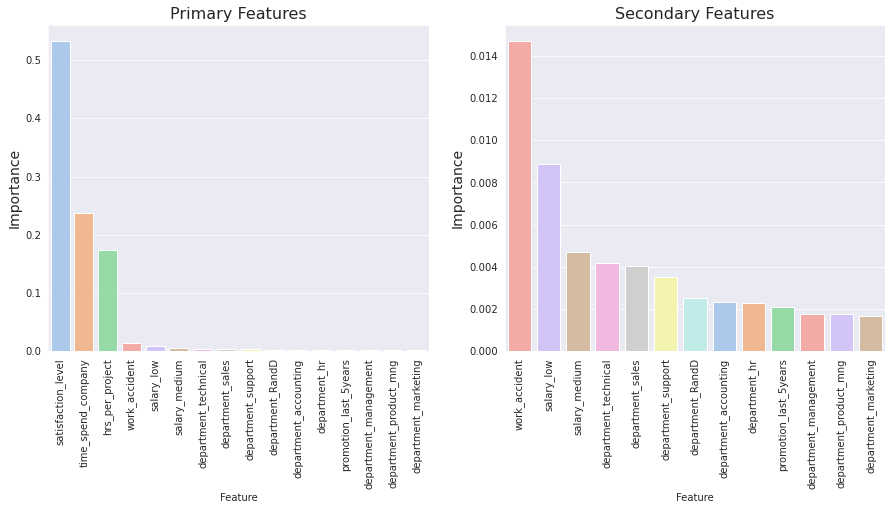

In [ ]:
colors = sns.color_palette('pastel',len(importance_df.Feature))
fig, (a0, a1) = plt.subplots(figsize=(6,15),ncols=2)
sns.barplot(x="Feature", y="Importance",data=importance_df,ax=a0,palette=colors)
a0.set_xticklabels(labels=importance_df['Feature'],rotation=90)
a0.set_title("Primary Features",fontsize=16)
a0.set_ylabel("Importance",fontsize=14)

sns.barplot(x="Feature", y="Importance",data=df_drop,ax=a1,palette=colors[3:])
a1.set_xticklabels(labels=df_drop['Feature'],rotation=90)
a1.set_title("Secondary Features",fontsize=16)
a1.set_ylabel("Importance",fontsize=14)
plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Key Insights & Recommendations

- The model chosen for predicting employee turn-over rates is a Tuned Random Forest Classifier. The cross-validation methods applied to the hyper-parameters will prevent the model to overfit to the training data and will improve the handling of randomness in the data.
- We used `accuracy`, `recall`, `precision` and `F1` as the evaluation metrics for quantifying the performance of the model. The score for each metric ar as follows `[98.65%, 95.98%, 98.47%, 97.21%]` respectively.
- We also see that the three most imoprtant features for predicting company turnover rates are: employee satisfaction, time spend on company, and monthly hours per project.
- We also see that salary level is the 4th most important feature, with a relevancy of less than 1%, which indicates that turnover rates are not a money issue.
- Out of all the departments it appears the tech department is the one with the highest feature importance with about 0.4%.
- We would point out that this does not mean that the tech department has the highest proportion of employees leaving, we are stating that if we know an employee belongs to the tech dpt then its will be easier to predict if the employee leaves or not.
- The first two top features are things the company cannot control, or at least not control directly. Hoewever, the third one which is hours worked per project which indicates how active that member has been with the company. A higher value in this feature means the employee has a lot of hour but not many projects, and a lower value indicates that the employe has many projects. As we see in the correlation matrix this featrue is positively correlated to the employees leaving which means that employees with hight values for this feature are likely to leave.

#### Suggestion
- Employees with low `hours_per_project` values are good candidates for investing time and resources into. We need to check correlation between thie variable and departments.


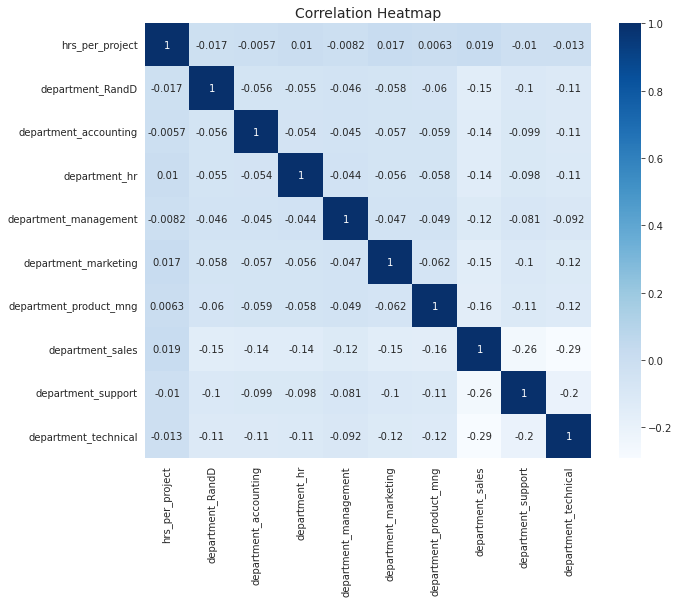

In [ ]:
df4 = df3.drop(columns=['satisfaction_level','last_evaluation','time_spend_company','work_accident','left'
                        ,'promotion_last_5years','salary_low','salary_medium'])
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df4.corr(),annot=True,cmap='Blues',ax=ax)
ax.set_title("Correlation Heatmap for Departments",fontsize=14)
plt.show()

### Department Recomendation
We see that the `sales` dpt is positively correlated to the hours per project variable, which indicates that this department tends towards higher values for this feature. As opposed to the `tech` department which is negatively correlated, which tells use this dpt tends towards smaller values for this featur.

### Final Statement
Given our previous observations we can recommend the company to invest time and resources into the `tech` department because this deparment tends to have the highest projects per hour and are very likely to continue with with company.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The random forest model was extremely accurate at classifying employees who left the company. This model showed us that the number of projects per hour is a good predictor towards the longevity of the employee. We then looked at the different departments and saw that the `tech` department was the department with the strongest negative correlation towards the engineered feature `hours_per_project`, which helped us conclude that these type of employees were more active in the company and are more likely to stay with the company. We also found out that salary was not a leading factor towards employees leaving the company.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.